En este archivo voy a hacer un EDA al conjunto de datos correspondiente a user_reviews.

Primero cargamos las librerías necesarias para hacer el EDA

In [1]:
# Importación de las librerías necesarias para trabajar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Ahora, cargo el archivo que contiene el conjunto de datos que vamos a analizar
reseñas = pd.read_parquet("user_reviews_complete.parquet")
# Verifico si el archivo se cargó correctamente
reseñas

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637
...,...,...,...,...,...,...,...,...
59300,,Posted July 10.,,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244
59301,,Posted July 8.,,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244
59302,1 person found this review funny,Posted July 3.,,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley
59303,,Posted July 20.,,730,No ratings yet,True,:D,LydiaMorley


A primera vista, vemos que es una tabla de 59305 filas y 8 columnas. Veamos más información al respecto.

In [5]:
reseñas.describe(include='all')

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
count,59305,59305,59305,59305,59305,59305,59305,59305
unique,186,1906,1015,3682,1344,2,55313,25458
top,,"Posted June 21, 2014.",,730,No ratings yet,True,good game,76561198094665607
freq,51154,225,53165,3759,30168,52473,100,20


Con esto vemos por ejemplo que de las 59305 reseñas, fueron hechas por menos de la mitad, 25458 usuarios. Veamos ahora más información acerca del Dataframe

In [7]:
reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        59305 non-null  object
 1   posted       59305 non-null  object
 2   last_edited  59305 non-null  object
 3   item_id      59305 non-null  object
 4   helpful      59305 non-null  object
 5   recommend    59305 non-null  bool  
 6   review       59305 non-null  object
 7   user_id      59305 non-null  object
dtypes: bool(1), object(7)
memory usage: 3.2+ MB


Vemos que las columnas aparentemente no tienen nulos, pero si nos concentramos en la primera de ella, podemos observar que tiene celdas vacías. Estas celdas en su interior tienen strings vacíos (""), por lo cuál voy a hacer esta pequeña transformación y ejecutar el método .info() nuevamente.

In [9]:
# Usamos replace con regex para que coincidan los string vacíos.
reseñas = reseñas.replace(r'^\s*$', float('nan'), regex=True)
reseñas

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,NaN,"Posted November 5, 2011.",NaN,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
1,NaN,"Posted July 15, 2011.",NaN,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
2,NaN,"Posted April 21, 2011.",NaN,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,NaN,"Posted June 24, 2014.",NaN,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
4,NaN,"Posted September 8, 2013.",NaN,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637
...,...,...,...,...,...,...,...,...
59300,NaN,Posted July 10.,NaN,70,No ratings yet,True,a must have classic from steam definitely wort...,76561198312638244
59301,NaN,Posted July 8.,NaN,362890,No ratings yet,True,this game is a perfect remake of the original ...,76561198312638244
59302,1 person found this review funny,Posted July 3.,NaN,273110,1 of 2 people (50%) found this review helpful,True,had so much fun plaing this and collecting res...,LydiaMorley
59303,NaN,Posted July 20.,NaN,730,No ratings yet,True,:D,LydiaMorley


Vemos que cambió, vamos ahora con el método .info() nuevamente.

In [10]:
reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        8151 non-null   object
 1   posted       59305 non-null  object
 2   last_edited  6140 non-null   object
 3   item_id      59305 non-null  object
 4   helpful      59305 non-null  object
 5   recommend    59305 non-null  bool  
 6   review       59267 non-null  object
 7   user_id      59305 non-null  object
dtypes: bool(1), object(7)
memory usage: 3.2+ MB


Ahora vamos a gráficas que tan vacías / llenas están las columnas según la información proporcionada anteriormente. Para ello nos ayudamos de matplotlib.

51154
0
53165
0
0
0
38
0


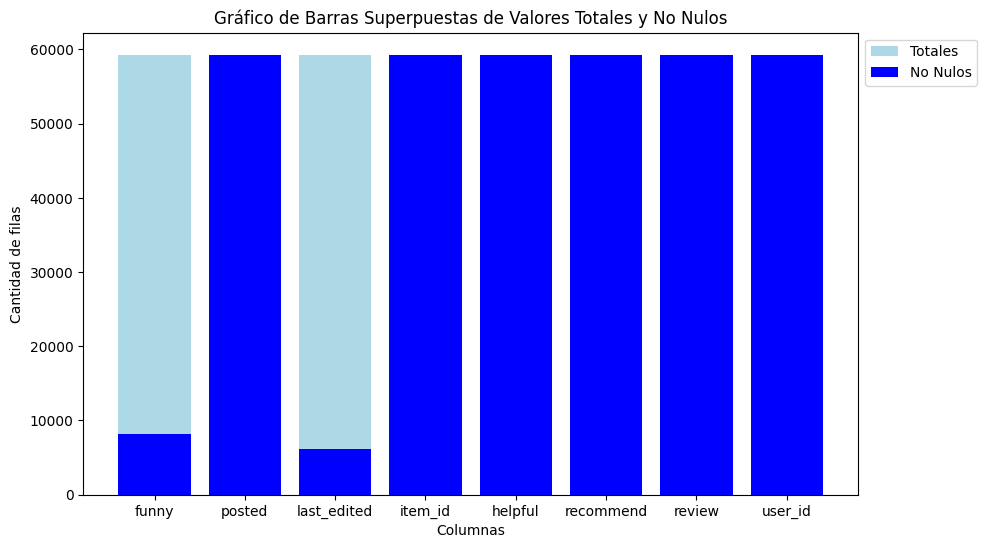

In [16]:
# Creamos un array de (8,1), este va a contener la cantidad total de filas en el Dataframe de forma reiterativa
total_reiterativo = np.full(8,59305)

# A partir de un bucle, llenamos una lista que contenga la cantidad de filas faltantes en cada columna.
filas_faltantes_por_columna = []
for datos_faltantes in reseñas.isnull().sum():
    filas_faltantes_por_columna.append(datos_faltantes)

# Calculamos los valores no nulos
celdas_llenas = np.array(total_reiterativo) - np.array(filas_faltantes_por_columna)

fig, ax = plt.subplots(figsize=(10, 6))

# Creamos las barras para los totales (nulos + no nulos) en color celeste claro
ax.bar(range(len(total_reiterativo)), total_reiterativo, color='lightblue', label='Totales')

# Creamos las barras para los no nulos en color azul
ax.bar(range(len(celdas_llenas)), celdas_llenas, color='blue', label='No Nulos')

# Añadir etiquetas y título
ax.set_xticks(range(len(total_reiterativo)))
ax.set_xticklabels(reseñas.columns)
ax.set_ylabel('Cantidad de filas')
ax.set_xlabel('Columnas')
ax.set_title('Gráfico de Barras Superpuestas de Valores Totales y No Nulos')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


# Mostrar el gráfico
plt.show()


Vemos que tanto la columna funny cómo last_edited tienen una cantidad de nulos tan grande, que convendría eliminarlas a las columnas en lugar de eliminar sus filas vacías. Ya que el hacerlo, reduciría significativamente el Dataframe. Exploremos ahora cada una de estas columnas para ver que información nos ofrece.

In [20]:
reseñas[~reseñas["funny"].isnull()]["funny"]

18       3 people found this review funny
19       1 person found this review funny
20       2 people found this review funny
24       1 person found this review funny
27       1 person found this review funny
                       ...               
59283    2 people found this review funny
59284    3 people found this review funny
59292    1 person found this review funny
59297    1 person found this review funny
59302    1 person found this review funny
Name: funny, Length: 8151, dtype: object

Cómo podemos observar y también deducir, en cada reseña dentro de Steam, los usuarios tienen la opción de clasificar si las reseña les resultó divertida. Es lógico pensar que no todos los usuarios interactuaron con esta funcionalidad, al menos en las reseñas que tengo disponibles en este DataFrame. Sólo cómo curiosidad, podríamos ver cuál fue la reseña que más personas catalogaron cómo graciosa divertida. 

In [31]:
# Para ello, primero importamos el módulo re
import re

# Creamos una lista que va a almacenar listas que contienen strings con los números dentro de cada reseña
lista = []

# Creamos un bucle for para recorrer cada reseña en el conjunto de reseñas que los usuarios determinaron cómo funny
for reseña in reseñas[~reseñas["funny"].isnull()]["funny"]:
    # Agregamos a la lista previamente creada sólo la parte númerica del string
    lista.append(re.findall(r'\d+', reseña))

# A partir de la lista, creamos una nueva lista que va a almacenar los números contenidos dentro de las listas en nuestra lista original
lista_nueva = []
for lista_interna in lista: # Iteramos por cada lista interna
    for str_numero in lista_interna: # Iteramos por cada string númerico dentro de la lista (es uno sólo por lista_interna)
        lista_nueva.append(int(str_numero)) # Transformamos en entero el número y lo agregamos a la lista nueva

print(lista_nueva) # Mostramos en pantalla

[3, 1, 2, 1, 1, 5, 1, 1, 17, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 524, 4, 1, 3, 1, 1, 1, 1, 1, 12, 1, 3, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 6, 4, 1, 2, 5, 1, 1, 1, 1, 7, 1, 103, 2, 1, 1, 3, 1, 1, 1, 2, 16, 1, 1, 34, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 6, 1, 2, 3, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 7, 3, 1, 1, 1, 1, 1, 1, 2, 9, 1, 12, 45, 2, 2, 11, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 2, 1, 97, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 7, 1, 3, 1, 4, 4, 1, 1, 2, 2, 1, 5, 2, 2, 2, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1, 1, 207, 3, 1, 1, 1, 2, 2, 1, 1, 1, 6, 1, 6, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 6, 2, 718, 2, 1, 1, 1, 1, 1, 1, 1, 1, 23, 1, 1, 1, 1, 2, 100, 3, 1, 1, 1, 1, 2, 5, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 4, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3, 2, 2, 8, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 2, 1, 1, 1, 3, 11, 1, 3, 1, 4, 2, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 5, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 1, 1, 1

Ahora quiero determinar las top 10 reseñas que acumulan más cantidad de funny's

In [32]:
top_funny = sorted(lista_nueva, reverse=True)[:10] # Ordenamos la lista de forma inversa, y nos quedamos con los primeros 10 valores
print(top_funny)  # Vemos en pantalla el resultado

[956, 954, 946, 876, 856, 852, 841, 830, 825, 759]


Ahora a partir de estos números, voy a buscar cada una de estas reseñas, y las voy a mostrar en pantalla

In [41]:
lista_indices = [] # Creamos una lista que va almacenar los indices correspondientes a las filas que corresponden con las reseñas más votadas
# Por cada número dentro de la lista top_funny
for cantidad_funny in top_funny:

    indice = reseñas[(reseñas['funny'].str.contains(str(cantidad_funny))) & (~reseñas["funny"].isnull())].index[0]

    lista_indices.append(indice)

print(lista_indices)

[34847, 29114, 17733, 50145, 6788, 51596, 21978, 23493, 55185, 14456]


Ahora, con esta lista de indices, filtro el dataframe 

In [42]:
reseñas[reseñas.index.isin(lista_indices)]

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
6788,856 people found this review funny,Posted May 29.,NaN,326460,793 of 941 people (84%) found this review helpful,True,"This game is:10% luck,20% skill,15% concentrat...",xXCOOK1EMANXx
14456,759 people found this review funny,"Posted June 26, 2015.",NaN,209160,519 of 656 people (79%) found this review helpful,False,This game is worse than my chance of getting a...,fartofsmellyness
17733,946 people found this review funny,"Posted January 9, 2015.",NaN,313740,831 of 954 people (87%) found this review helpful,True,Look behind you simulator.lmao,russelmao
21978,841 people found this review funny,"Posted May 3, 2015.",NaN,242920,589 of 639 people (92%) found this review helpful,True,After accidentally closing my eyes to blink wh...,Luxzackian
23493,830 people found this review funny,"Posted March 6, 2015.","Last edited March 15, 2015.",333600,535 of 667 people (80%) found this review helpful,True,"I was only 9 years oldI loved Chocola so much,...",76561198045400287
29114,"1,954 people found this review funny","Posted December 4, 2015.","Last edited December 5, 2015.",8930,"1,581 of 1,678 people (94%) found this review ...",True,I can sum this game up in one game play.I play...,76561198109249377
34847,956 people found this review funny,"Posted May 19, 2015.",NaN,292030,"1,144 of 1,356 people (84%) found this review ...",True,Tutorial area took me 8 hours to complete.I re...,marhan
50145,876 people found this review funny,"Posted November 29, 2014.","Last edited November 29, 2014.",218620,"787 of 1,040 people (76%) found this review he...",True,"Ah, the world of Payday 2...A world where armo...",76561198060545297
51596,852 people found this review funny,"Posted November 22, 2014.",NaN,730,"1,072 of 1,208 people (89%) found this review ...",True,"Got called a Hacker, Best moment in my life",Scrfiin
55185,825 people found this review funny,"Posted January 14, 2015.",NaN,304930,474 of 588 people (81%) found this review helpful,True,Started as a naked person in a zombie apocalyp...,whatismyid


Veamos sólo las reseñas

In [44]:
for reseña_top_graciosa in reseñas[reseñas.index.isin(lista_indices)]["review"]:
    print(reseña_top_graciosa)
    print()

This game is:10% luck,20% skill,15% concentrated power of will,5% pleasure,50% pain,100% reason to purchase the game.

This game is worse than my chance of getting a girlfriend.

Look behind you simulator.lmao

After accidentally closing my eyes to blink while tasking my first batch of villagers, I opened them to find everyone dead from starvation except five children. Thankfully there were enough cabbages in storage for them to survive for two years until they grew up. After tasking them as fishermen on a nearby river I learned fishermen can consistently fish about three fish a year, enough to sustain almost 0.000001% of my population. As my village began to grow once more I felt the shattered fragments of my soul beginning to piece themselves back together. However, six fishermen in a village of seven people was not enough, and I quickly learned this as I watched all my young adults starve once more. I still had two people left. As they progressively had more and more sex and my ince

Confirmamos que sí, algunas son bastante graciosas.

Veamos ahora la columna last_edited

In [45]:
reseñas[~reseñas["last_edited"].isnull()]["last_edited"] # Vemos que lo que nos ofrece esta columna es información acerca de cuando fué la última vez que se editó la reseña. Es lógico pensar que no todas las personas luego de hacer una reseña, vuelven a editarla, esa sería mi suposición de por qué hay tanta cantidad de nulos. 

7         Last edited December 5, 2015.
23       Last edited November 25, 2013.
24       Last edited November 25, 2013.
25           Last edited June 22, 2014.
26       Last edited November 25, 2013.
                      ...              
59190    Last edited September 8, 2015.
59196              Last edited June 17.
59197             Last edited April 20.
59200             Last edited April 29.
59281            Last edited August 13.
Name: last_edited, Length: 6140, dtype: object